In [1]:
# Importing the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading in the dataset
df = pd.read_csv('data/world_population.csv')
df.head()

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


### From google ,i got the information that the countries in the Indian subcontinent are :
###`[India, Nepal, Bangladesh, Pakistan, Bhutan, Sri Lanka, and the Maldives]`

In [8]:
req_countries = ['India', 'Nepal', 'Bangladesh', 'Pakistan', 'Bhutan', 'Sri Lanka', 'Maldives']

In [74]:
# Indexing the rows from df which have any of the above countries in their 'Country' column
req_df = df.loc[df['Country'].isin(req_countries)]
req_df

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
16,8,BGD,Bangladesh,Dhaka,Asia,171186372,167420951,157830000,148391139,129193327,107147651,83929765,67541860,147570,1160.0350,1.0108,2.15
23,165,BTN,Bhutan,Thimphu,Asia,782455,772506,743274,705516,587207,558442,415257,298894,38394,20.3796,1.0064,0.01
92,2,IND,India,New Delhi,Asia,1417173173,1396387127,1322866505,1240613620,1059633675,870452165,696828385,557501301,3287590,431.0675,1.0068,17.77
123,174,MDV,Maldives,Malé,Asia,523787,514438,435582,361575,282507,224957,164887,123243,300,1745.9567,1.0045,0.01
143,49,NPL,Nepal,Kathmandu,Asia,30547580,29348627,27610325,27161567,24559500,19616530,15600442,12501285,147181,207.5511,1.0171,0.38
156,5,PAK,Pakistan,Islamabad,Asia,235824862,227196741,210969298,194454498,154369924,115414069,80624057,59290872,881912,267.4018,1.0191,2.96
197,61,LKA,Sri Lanka,Colombo,Asia,21832143,21715079,21336697,20668557,18776371,17204094,14943645,12388769,65610,332.7563,1.0027,0.27


In [24]:
# Total population of the Indian Subcontinent over the years
req_df.sum(axis = 0)[5:13]

2022 Population    1877870372
2020 Population    1843355469
2015 Population    1741791681
2010 Population    1632356472
2000 Population    1387402511
1990 Population    1130617908
1980 Population     892506438
1970 Population     709646224
dtype: object

In [26]:
# Shifting the value of population upward by 1
req_df.sum(axis = 0)[5:13].shift(-1)

2022 Population    1843355469
2020 Population    1741791681
2015 Population    1632356472
2010 Population    1387402511
2000 Population    1130617908
1990 Population     892506438
1980 Population     709646224
1970 Population           NaN
dtype: object

In [75]:
# Calculating the growth rate of Indian subcontinent over the years
a = 100*(req_df.sum(axis = 0)[5:13] - req_df.sum(axis = 0)[5:13].shift(-1)) / req_df.sum(axis = 0)[5:13].shift(-1)
a

2022 Population     1.872395
2020 Population     5.830995
2015 Population     6.704124
2010 Population     17.65558
2000 Population    22.711882
1990 Population    26.678964
1980 Population    25.767799
1970 Population          NaN
dtype: object

In [76]:
# Converting a to a dataframe and resetting the index
a = pd.DataFrame(a).reset_index()
a.columns = ['Year' ,'% growth rate']
a

,Year,% growth rate
0,2022 Population,1.872395
1,2020 Population,5.830995
2,2015 Population,6.704124
3,2010 Population,17.65558
4,2000 Population,22.711882
5,1990 Population,26.678964
6,1980 Population,25.767799
7,1970 Population,NaN


In [78]:
# Removing the word 'population' from year column values
a['Year'] = a['Year'].apply(lambda x: int(x.split()[0]))
a

,Year,% growth rate
0,2022,1.872395
1,2020,5.830995
2,2015,6.704124
3,2010,17.65558
4,2000,22.711882
5,1990,26.678964
6,1980,25.767799
7,1970,NaN


In [80]:
# Dropping the 1970 growth rate,since we dont have it for that year
a = a.dropna()

# Rounding off the growth rates to just 2 decimal places
a['% growth rate'] = a['% growth rate'].apply(lambda x: np.round(x ,2))

a

,Year,% growth rate
0,2022,1.87
1,2020,5.83
2,2015,6.70
3,2010,17.66
4,2000,22.71
5,1990,26.68
6,1980,25.77


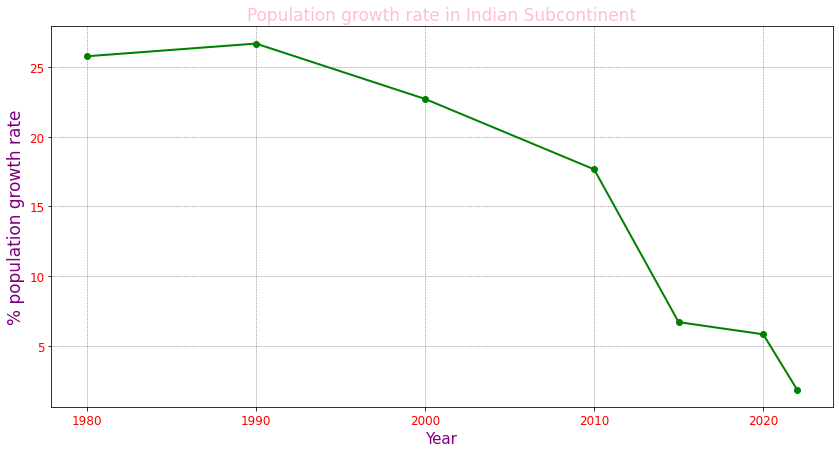

In [81]:
# Plotting the population growth rate on a line plot for different years
plt.figure(figsize=(14,7))
plt.plot(a['Year'] , a['% growth rate'] ,'o-' ,color = 'green' ,linewidth=2)
plt.xlabel('Year' ,color = 'purple',size=15)
plt.ylabel("% population growth rate" ,color = 'purple' ,size =17)
plt.xticks(size=12 ,color='red')
plt.yticks(size=12 , color='red')

plt.grid(b = True ,
         linewidth = 0.5,
         linestyle = '--',
         color = 'gray')

plt.title('Population growth rate in Indian Subcontinent' ,size = 17 ,color='pink');